In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd


In [2]:
# Load the dataset
df = pd.read_csv("/Users/taurangela/Desktop/Test/Dataset/Raw/imdb_top_1000.csv")


In [3]:
# Initial data inspection

df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [5]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [6]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [7]:
# Remove unnecessary columns

df.drop(columns=['Poster_Link'], inplace=True)
removed_columns = ['Poster_Link']
print(f"columns {', '.join(removed_columns)} removed")


columns Poster_Link removed


In [8]:
#Null data

df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [9]:
# Fill null values in the 'Certificate' column with 'U' (General Viewing for all ages)
df['Certificate'].fillna('U', inplace=True)

# Fill null values in the 'Meta_score' column with the mean of the column
df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True)

# Clean the 'Gross' column by removing commas and converting it to integer type
df["Gross"] = df["Gross"].str.replace(",","")
df["Gross"] = df["Gross"].replace(np.nan, 0)
df["Gross"] = df["Gross"].astype(int)

# Fill null values in the 'Gross' column with the average gross
df["Gross"] = df["Gross"].replace(0, df['Gross'].mean())


In [10]:
df.isnull().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [11]:
# Validate column types after data cleaning
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    1000 non-null   object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     1000 non-null   float64
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  No_of_Votes    1000 non-null   int64  
 14  Gross          1000 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 117.3+ KB


In [12]:
# Extract the numerical part of the 'Runtime' column and convert it to integer type
df["Runtime"] = df["Runtime"].str.extract('([^\s]+)')
df["Runtime"] = df["Runtime"][~(df["Runtime"] == "min")]
df["Runtime"] = df["Runtime"].astype(int)


In [13]:
# Check the unique values present in the 'Released_Year' column
print("\nUnique values in 'Released_Year' column:")
print(df['Released_Year'].unique())


Unique values in 'Released_Year' column:
['1994' '1972' '2008' '1974' '1957' '2003' '1993' '2010' '1999' '2001'
 '1966' '2002' '1990' '1980' '1975' '2020' '2019' '2014' '1998' '1997'
 '1995' '1991' '1977' '1962' '1954' '1946' '2011' '2006' '2000' '1988'
 '1985' '1968' '1960' '1942' '1936' '1931' '2018' '2017' '2016' '2012'
 '2009' '2007' '1984' '1981' '1979' '1971' '1963' '1964' '1950' '1940'
 '2013' '2005' '2004' '1992' '1987' '1986' '1983' '1976' '1973' '1965'
 '1959' '1958' '1952' '1948' '1944' '1941' '1927' '1921' '2015' '1996'
 '1989' '1978' '1961' '1955' '1953' '1925' '1924' '1982' '1967' '1951'
 '1949' '1939' '1937' '1934' '1928' '1926' '1920' '1970' '1969' '1956'
 '1947' '1945' '1930' '1938' '1935' '1933' '1932' '1922' '1943' 'PG']


In [14]:
# Drop rows containing 'PG' to convert the 'Released_Year' column to integer datatype
df = df.drop(labels=966, axis=0)
df['Released_Year'] = df['Released_Year'].astype(int)

In [15]:
# Check the unique values present in the 'IMDB_Rating' column
print("\nUnique values in 'IMDB_Rating' column:")
print(df['IMDB_Rating'].unique())


Unique values in 'IMDB_Rating' column:
[9.3 9.2 9.  8.9 8.8 8.7 8.6 8.5 8.4 8.3 8.2 8.1 8.  7.9 7.8 7.7 7.6]


In [16]:
# Check the unique values present in the 'Certificate' column
print("\nUnique values in 'Certificate' column:")
print(df['Certificate'].unique())


Unique values in 'Certificate' column:
['A' 'UA' 'U' 'PG-13' 'R' 'PG' 'G' 'Passed' 'TV-14' '16' 'TV-MA' 'Unrated'
 'GP' 'Approved' 'TV-PG' 'U/A']


In [17]:
# Check the unique values present in the 'Meta_score' column
print("\nUnique values in 'Meta_score' column:")
print(df['Meta_score'].unique())


Unique values in 'Meta_score' column:
[ 80.         100.          84.          90.          96.
  94.          74.          66.          92.          82.
  87.          73.          83.          77.97153025  79.
  91.          61.          59.          65.          85.
  98.          89.          88.          57.          67.
  62.          77.          64.          75.          97.
  99.          78.          68.          81.          95.
  76.          69.          55.          70.          58.
  86.          71.          63.          93.          72.
  60.          47.          49.          50.          33.
  54.          56.          51.          53.          48.
  44.          45.          40.          52.          28.
  36.          46.          30.          41.        ]


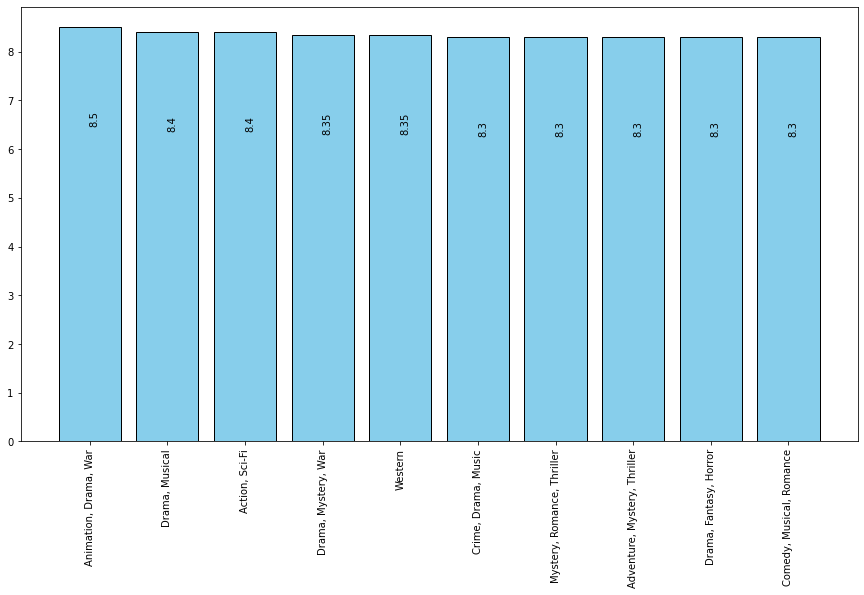

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


# Visualize the top rated genres by IMDb rating
top_rates = df.groupby('Genre').mean().sort_values('IMDB_Rating', ascending=False).head(10)
top_rates = top_rates[['IMDB_Rating']].round(2)
top_rates.reset_index(inplace=True)

plt.figure(figsize=(15, 8))
plt.bar(top_rates['Genre'], top_rates['IMDB_Rating'], color='skyblue', edgecolor='black')
plt.xticks(rotation='vertical')
for k, v in top_rates['IMDB_Rating'].items():
    plt.text(k, v - 2, str(v), rotation=90)
plt.show()

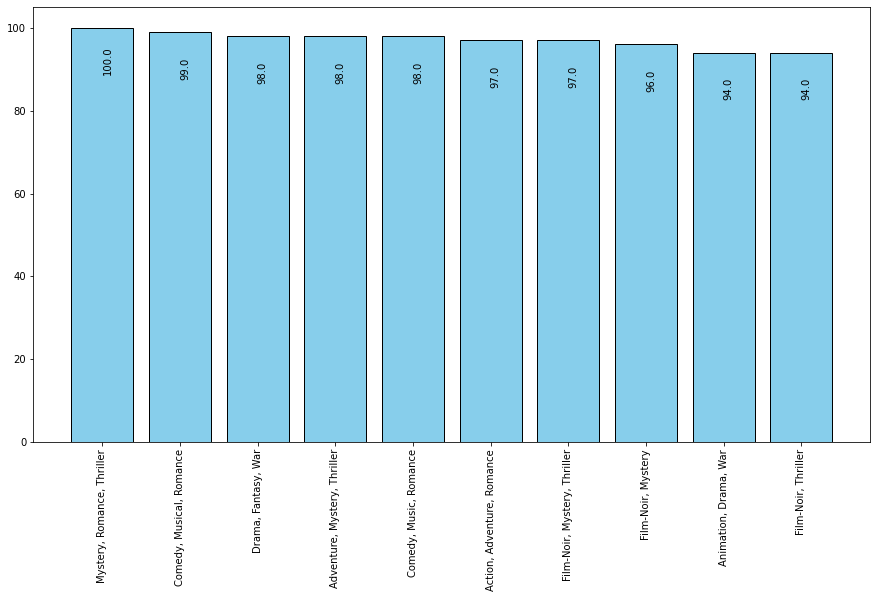

In [19]:
# Visualize the top genres by Meta score
top_rates = df.groupby('Genre').mean().sort_values('Meta_score', ascending=False).head(10)
top_rates = top_rates[['Meta_score']].round(2)
top_rates.reset_index(inplace=True)

plt.figure(figsize=(15, 8))
plt.bar(top_rates['Genre'], top_rates['Meta_score'], color='skyblue', edgecolor='black')
plt.xticks(rotation='vertical')
for k, v in top_rates['Meta_score'].items():
    plt.text(k, v - 11, str(v), rotation=90)
plt.show()

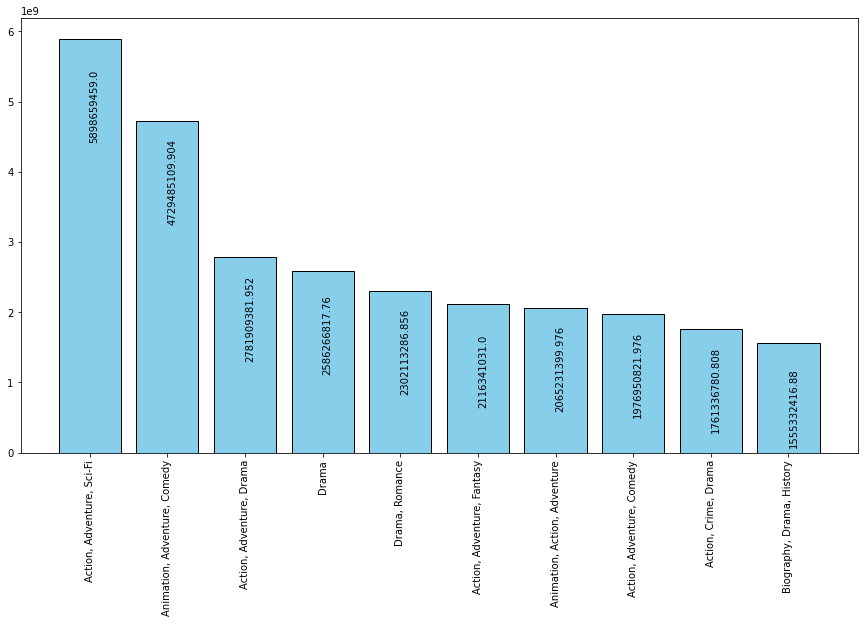

In [20]:
# Visualize the top earning genres
top_earn = df.groupby('Genre').sum().sort_values('Gross', ascending=False).head(10)
top_earn = top_earn[['Gross']]
top_earn.reset_index(inplace=True)

plt.figure(figsize=(15, 8))
plt.bar(top_earn['Genre'], top_earn['Gross'], color='skyblue', edgecolor='black')
plt.xticks(rotation='vertical')
for k, v in top_earn['Gross'].items():
    plt.text(k, v - 1450000000, str(v), rotation=90)
plt.show()

In [21]:
# Save the cleaned data into a CSV file
cleaned_data_path = "/Users/taurangela/Desktop/Test/Dataset/Cleaned/cleaned_imdb_data.csv"
df.to_csv(cleaned_data_path, index=False)

print("Cleaned data saved successfully to:", cleaned_data_path)


Cleaned data saved successfully to: /Users/taurangela/Desktop/Test/Dataset/Cleaned/cleaned_imdb_data.csv
